In [235]:
import pandas as pd
from scipy.stats import linregress as linreg
%matplotlib inline

In [236]:
data = pd.read_csv("match_events.csv")
data.tail()

,Time,Competitor,Operation,OrderId,Side,Volume,Price,Lifespan,Fee,FuturePrice,EtfPrice,AccountBalance,FuturePosition,EtfPosition,ProfitLoss,TotalFees,MaxDrawdown,BuyVolume,SellVolume
74803,2489.75,ExampleTwo,Tick,NaN,NaN,NaN,NaN,NaN,0.0,3421.0,3423.0,1130.17,1,-1,1128.17,-112.17,38.63,3297,3298
74804,2489.75,TraderOne,Tick,NaN,NaN,NaN,NaN,NaN,0.0,3421.0,3423.0,7667.18,0,0,7667.18,-1492.68,415.12,3851,3851
74805,2490.00,ExampleOne,Tick,NaN,NaN,NaN,NaN,NaN,0.0,3421.0,3423.0,482.32,-101,101,684.32,85.68,1212.00,337,236
74806,2490.00,ExampleTwo,Tick,NaN,NaN,NaN,NaN,NaN,0.0,3421.0,3423.0,1130.17,1,-1,1128.17,-112.17,38.63,3297,3298
74807,2490.00,TraderOne,Tick,NaN,NaN,NaN,NaN,NaN,0.0,3421.0,3423.0,7667.18,0,0,7667.18,-1492.68,415.12,3851,3851


In [237]:
traderone = data[data["Competitor"] == "TraderOne"]
traderone_profit = traderone["ProfitLoss"]
slope, intercept, r_val, p_val, std = linreg(traderone["Time"], traderone["ProfitLoss"])
traderone_stat = ["TraderOne", traderone_profit.iloc[-1], std]

exampleone = data[data["Competitor"] == "ExampleOne"]
exampleone_profit = exampleone["ProfitLoss"]
slope, intercept, r_val, p_val, std = linreg(exampleone["Time"], exampleone["ProfitLoss"])
exampleone_stat = ["CashMoney", exampleone_profit.iloc[-1], std]

exampletwo = data[data["Competitor"] == "ExampleTwo"]
exampletwo_profit = exampletwo["ProfitLoss"]
slope, intercept, r_val, p_val, std = linreg(exampletwo["Time"], exampletwo["ProfitLoss"])
exampletwo_stat = ["Best Trader", exampletwo_profit.iloc[-1], std]

leader = ''
best_profit = 0
best_std = 0
for i in [traderone_stat, exampleone_stat, exampletwo_stat]:
    if i[1] > best_profit:
        leader = i[0]
        best_std = i[2]
        best_profit = i[1]
    elif i[1] == best_std:
        if i[2] > best_std:
            leader = i[0]
            best_std = i[2]
            best_profit = i[1]

print("{} is in the lead with a profit of {} and a standard error of {:.2f}".format(leader, best_profit, best_std))



TraderOne is in the lead with a profit of 7667.18 and a standard error of 0.00


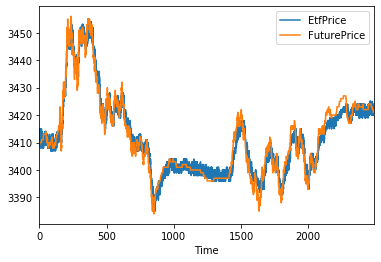

In [238]:
ax = data.plot(0, 10)
data.plot(0, 9, ax= ax)

20858


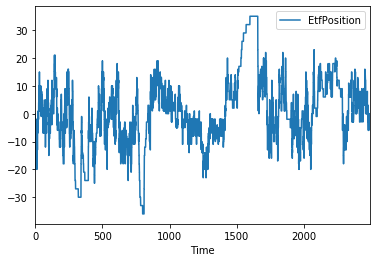

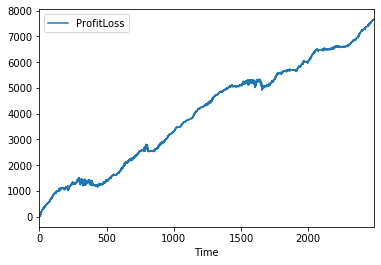

In [239]:
traderone.plot(0, 13)
traderone.plot(0, 14)
print(len(traderone))

11851


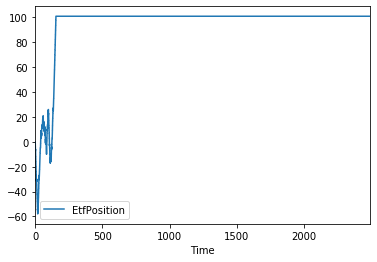

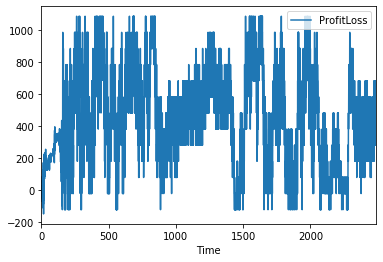

In [240]:
exampleone.plot(0, 13)
exampleone.plot(0, 14)
print(len(exampleone))

42099


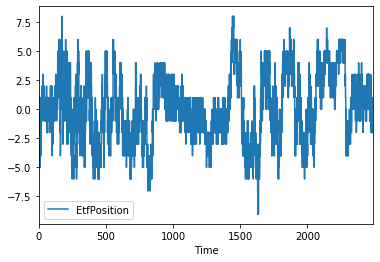

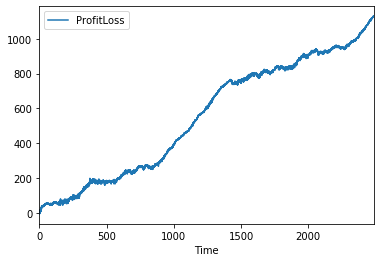

In [241]:
exampletwo.plot(0, 13)
exampletwo.plot(0, 14)
print(len(exampletwo))